# Popularity Ranking of Twice Members based on Reddit Votes

[Original reddit thread](https://www.reddit.com/r/twice/comments/ad0y53/popularity_ranking_of_members_based_on_rtwice_and/)

I recently discovered that /r/twice and /r/twicemedia encourage posts to have real member names in the title. This makes it easy to scrape both subreddits. So, I thought it would be cool to see which members are the most popular based on their total number of votes. 

## Scraping

In [1]:
import praw
import os
import yaml
from psaw import PushshiftAPI
import datetime as dt
import pandas as pd

In [2]:
secrets_file = "reddit.yaml"
if os.path.isfile(secrets_file):
    with open(secrets_file, "r") as f:
        doc = yaml.load(f)
secrets = doc

In [3]:
r = praw.Reddit(client_id=secrets['client_id'],
                client_secret=secrets['client_secret'],
                username=secrets['username'],
                password=secrets['password'],
                user_agent=secrets['user_agent'])
api = PushshiftAPI(r)

In [4]:
twice = ['nayeon', 'tzuyu', 'jeongyeon', 'momo', 'sana', 'mina', 'jihyo', 'dahyun', 'chaeyoung']
era_dates = \
    [[(2015, 1, 1), (2016, 4, 25)],
        [(2016, 4, 25), (2016, 10, 24)],
        [(2016, 10, 24), (2017, 2, 20)],
        [(2017, 2, 20), (2017, 5, 15)],
        [(2017, 5, 15), (2017, 10, 30)],
        [(2017, 10, 30), (2018, 2, 7)],
        [(2018, 2, 7), (2018, 4, 9)],
        [(2018, 4, 9), (2018, 7, 9)],
        [(2018, 7, 9), (2018, 11, 5)],
        [(2018, 11, 5), None]]

eras = ['Like Ooh-Ahh','Cheer Up','TT','Knock Knock','Signal',
        'Likey','Heart Shaker','What is Love?', 'Dance The Night Away',
        'Yes or Yes']

In [5]:
df = pd.DataFrame(columns=[[era for era in eras for _ in (0, 1)],['votes','posts']*len(eras)],index=twice).fillna(0)
dfr = pd.DataFrame(0,columns=twice,index=twice)

In [6]:

for i,era in enumerate(era_dates):
    print(eras[i])
    submissions = list(api.search_submissions(subreddit=['twicemedia','twice'],
                                            after=(int(dt.datetime(*era[0]).timestamp())),
                                            before=(int(dt.datetime(*era[1]).timestamp())) if era[1] else None))
    for submission in submissions:
        for mem in twice:
            lowered_title = submission.title.lower()
            if mem in lowered_title:
                title_members = []
                for member in twice:
                    if member in lowered_title:
                        title_members.append(member)
                if len(title_members) == 2:
                    dfr[title_members[0]][title_members[1]] += 1
                    dfr[title_members[1]][title_members[0]] += 1
                elif len(title_members) == 1:
                    df.loc[mem][eras[i], 'votes'] += submission.score
                    df.loc[mem][eras[i], 'posts'] += 1
                break

Like Ooh-Ahh
Cheer Up
TT
Knock Knock
Signal
Likey
Heart Shaker
What is Love?
Dance The Night Away
Yes or Yes


In [7]:
df['Total Votes'] = df.filter(like='votes').sum(axis=1)
df['Total Posts'] = df.filter(like='posts').sum(axis=1)
df['Average Votes'] = df['Total Votes']/df['Total Posts']
df.to_csv('twice_posts_data.csv')
dfr.to_csv('twice_relationship_Data.csv')
df

Like Ooh-Ahh       Cheer Up           TT       Knock Knock        \
                 votes posts    votes posts  votes posts       votes posts   
nayeon            1337    46     4623    88  12283   143       21171   182   
tzuyu             2613   112     6002   129  18448   240       27800   264   
jeongyeon          200    12     1505    49   2339    49        5124    75   
momo              1654    54     6430   138  20569   252       25954   218   
sana              1751    50     6614   111  24928   209       31901   257   
mina              1299    45     7672   128  18650   167       29806   222   
jihyo              291    10     1400    38   2887    50        6425    64   
dahyun            1218    40     3153    76   5397    80        6821    70   
chaeyoung          493    20     2712    64   5990    92        7069    69   

           Signal            ...      Heart Shaker What is Love?        \
            votes posts      ...             posts         votes posts   
nayeon      72660   515      ...               354        108686   625   
tzuyu       77303   652      ...               240        112022   566   
jeongyeon   14115   161      ...               125         57942   326   
momo        74415   552      ...               227        112549   520   
sana       128970   915      ...               331        185498   859   
mina        91057   642      ...               405        179358   803   
jihyo       25099   231      ...               135         76028   383   
dahyun      19788   193      ...               232         80510   456   
chaeyoung   31146   273      ...               370        105680   616   

          Dance The Night Away       Yes or Yes       Total Votes Total Posts  \
                         votes posts      votes posts                           
nayeon                   76180   520     141829   989      564426        3796   
tzuyu                    93611   602     172401  1189      596205        4262   
jeongyeon                62125   464      83066   651      257129        2047   
momo                    137264   914     173871  1266      637220        4458   
sana                    144848   863     233216  1403      941048        5611   
mina                    140652   855     254428  1566      873932        5253   
jihyo                    62836   426     112386   824      342274        2386   
dahyun                   42402   329     157759   967      376139        2575   
chaeyoung                69147   573     189171  1353      509230        3704   

          Average Votes  
                         
nayeon       148.689673  
tzuyu        139.888550  
jeongyeon    125.612604  
momo         142.938537  
sana         167.714846  
mina         166.368171  
jihyo        143.450964  
dahyun       146.073398  
chaeyoung    137.481102  

[9 rows x 23 columns]

In [8]:
dfr

,nayeon,tzuyu,jeongyeon,momo,sana,mina,jihyo,dahyun,chaeyoung
nayeon,0,112,171,293,188,112,109,80,105
tzuyu,112,0,117,146,172,113,70,111,180
jeongyeon,171,117,0,138,216,75,70,51,123
momo,293,146,138,0,307,149,69,182,145
sana,188,172,216,307,0,241,169,347,143
mina,112,113,75,149,241,0,107,78,151
jihyo,109,70,70,69,169,107,0,19,41
dahyun,80,111,51,182,347,78,19,0,174
chaeyoung,105,180,123,145,143,151,41,174,0


## Visualization

In [9]:
from pandas.plotting import parallel_coordinates
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

Text(0.5, 1.0, 'Popularity Ranking Based on Reddit Votes')

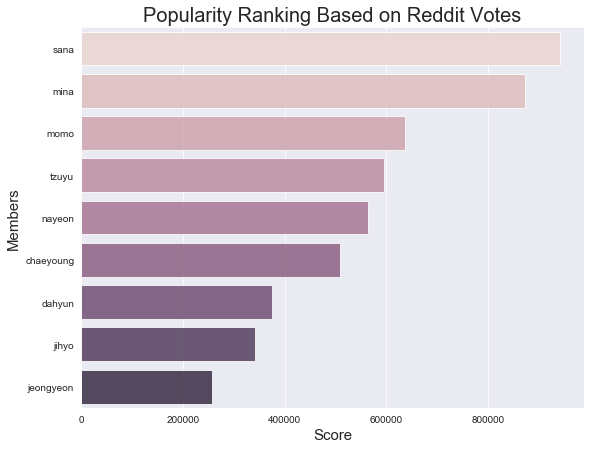

In [10]:
df2 = df[['Total Votes', 'Total Posts', 'Average Votes']].sort_values('Total Votes', ascending=False).reset_index()

plt.figure(figsize=(9,7))
sns.set_style(style='darkgrid')
ax = sns.barplot(x='Total Votes', y='index', data=df2,
            palette=sns.cubehelix_palette(9),alpha=0.8)
ax.set_xlabel('Score',fontsize=15)
ax.set_ylabel('Members',fontsize=15)
ax.set_title('Popularity Ranking Based on Reddit Votes',fontsize=20)

I was also curious to see which members were the most popular across each era. I decided to divide the scores by eras and create a separate Twice ranking for each era. An era starts at the release date of a single and ends at the release date of the next single. I only counted singles that had more than 100m views on Youtube.

In [13]:
eras_shortened = ['Like Ooh','Cheer Up','TT','Knock K','Signal','Likey','Heart Sh','What is Lo','Dance the','Yes or Yes']
df1 = df.filter(like='votes')\
    .rank(ascending=False)
df1.columns = eras_shortened
df1 = df1.reset_index()

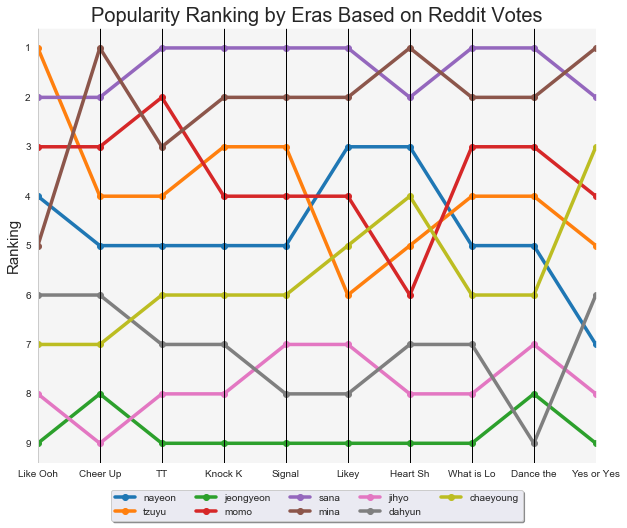

In [15]:
plt.figure(figsize=(10,8))
ax = parallel_coordinates(df1,'index',sort_labels=False,
                     color=sns.color_palette(),
                     linewidth=3.5,marker='o')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
ax.set_ylabel('Ranking',fontsize=15)
ax.set_title('Popularity Ranking by Eras Based on Reddit Votes',fontsize=20)
ax.invert_yaxis()
ax.set_facecolor([0.96,0.96,0.96])
ax.grid(False)

In [17]:
df3 = df['Total Posts'].sort_values(ascending=True)

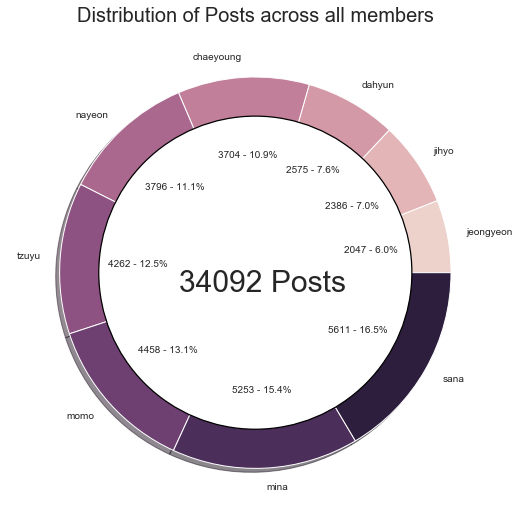

In [18]:
plt.figure(figsize=(9,9))
ax, tx, autotexts = plt.pie(df3.tolist(), labels=df3.index, colors=sns.cubehelix_palette(9),
        autopct='%1.1f%%', shadow=True)
centre_circle = plt.Circle((0,0),0.8,color='black', fc='white',linewidth=1.25)
total = plt.text(-0.39,-.1,str(int(df3.sum()))+' Posts',fontsize=30)
for i, a in enumerate(autotexts):
    a.set_text("{} - {}".format(int(df3[i]), a.get_text()))
plt.title('Distribution of Posts across all members',fontsize=20)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

Text(0.5, 1.0, 'Twice Pair Scores Based on Reddit Titles')

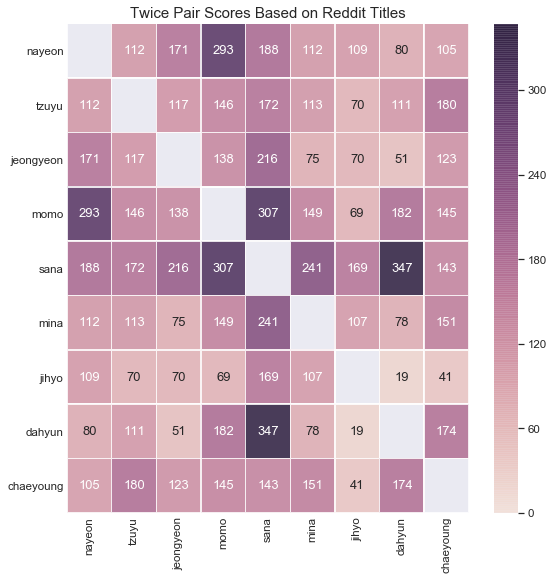

In [20]:
mask = dfr.mask(dfr == 0).isna()
plt.figure(figsize=(9,9))
sns.set(font_scale=1.05)
ax = sns.heatmap(dfr,alpha=0.85, annot=True, annot_kws={"size": 13},fmt="d",linewidths=.5,cmap=sns.cubehelix_palette(as_cmap=True, light=.9),mask=mask)
ax.tick_params(length=0)
plt.yticks(rotation=0)
ax.set_title('Twice Pair Scores Based on Reddit Titles',fontsize=15)

In [21]:
df_pair = pd.Series([])
for i in range(len(twice)):
    for j in range(i,len(twice)):
        df_pair.at[twice[i] + ' - ' + twice[j]] =  dfr.loc[twice[i],twice[j]]
df_pair = df_pair.sort_values(ascending=False)[0:-9]
df_pair

sana - dahyun            347
momo - sana              307
nayeon - momo            293
sana - mina              241
jeongyeon - sana         216
nayeon - sana            188
momo - dahyun            182
tzuyu - chaeyoung        180
dahyun - chaeyoung       174
tzuyu - sana             172
nayeon - jeongyeon       171
sana - jihyo             169
mina - chaeyoung         151
momo - mina              149
tzuyu - momo             146
momo - chaeyoung         145
sana - chaeyoung         143
jeongyeon - momo         138
jeongyeon - chaeyoung    123
tzuyu - jeongyeon        117
tzuyu - mina             113
nayeon - mina            112
nayeon - tzuyu           112
tzuyu - dahyun           111
nayeon - jihyo           109
mina - jihyo             107
nayeon - chaeyoung       105
nayeon - dahyun           80
mina - dahyun             78
jeongyeon - mina          75
jeongyeon - jihyo         70
tzuyu - jihyo             70
momo - jihyo              69
jeongyeon - dahyun        51
jihyo - chaeyo